In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt

In [3]:
n_epochs = 100
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [14]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [16]:
example_data.shape


torch.Size([1000, 1, 28, 28])

In [17]:
example_targets.shape

torch.Size([1000])

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 320)
        self.fc2 = nn.Linear(320, 50)
        self.fc3 = nn.Linear(50, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [27]:
network = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

network.to(device)

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
criterion = nn.CrossEntropyLoss()

In [36]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [25]:
def train(epoch):
    network.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0],-1)
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
#         scheduler.step(total_loss/cntr)
        print(running_loss)
    train_losses.append(running_loss)
    print(epoch,running_loss)

In [38]:
for epoch in range(1, n_epochs + 1):
  train(epoch)

/home/abhigyan.ghosh/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


0.19743885356001556
0.19561346750742814
0.19440150609079865
0.1925024935719648
0.19134798733489333
0.18987797776117077
0.18820992384326019
0.1867312290373775
0.1855170089420426
0.18395712365554573
0.1825220630773856
0.18108272148856486
0.1797836473708685
0.17866938256565845
0.17723645126670817
0.17584262674392903
0.17465614470756918
0.17329177055853506
0.1719660297653718
0.1709482919545735
0.16952072959588804
0.16834974713265183
0.1670813068399184
0.16601847732727038
0.16481864190063789
0.16360231489579746
0.16257205143710962
0.1613520488933773
0.16029706870995142
0.1590948524263922
0.15818876746948263
0.15707391544583515
0.15617165435196512
0.15498960662444006
0.15396082577717607
0.15279368628489465
0.15219079963435433
0.1509196491019793
0.15003076631865042
0.14869523074344215
0.14799541966976903
0.14729383054782375
0.14607857105602307
0.14522066436597925
0.14423250791264763
0.1435132082083328
0.1425189338542623
0.1419444834357364
0.1408607019830015
0.1399109910325933
0.13892300667930

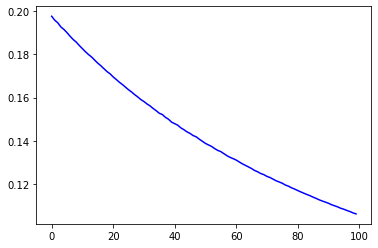

In [39]:
fig = plt.figure()
plt.plot([i for i in range(100)],train_losses, color='blue')

In [47]:
lr = 1e-5
network = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

network.to(device)

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
criterion = nn.CrossEntropyLoss()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [48]:
for epoch in range(1, n_epochs + 1):
  train(epoch)

/home/abhigyan.ghosh/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


1 536.2037148326635
2 226.1472428664565
3 169.1773666627705
4 132.87531877867877
5 108.68137369770557
6 91.7082595154643
7 77.68209717515856
8 66.90885434346274
9 58.004629702772945
10 50.46536469552666
11 44.38035653810948
12 38.87566809472628
13 34.50573988072574
14 30.62100656295661
15 27.147271942114457
16 23.996427359525114
17 21.126980165136047
18 18.908183536259457
19 16.822829942801036
20 14.74329275492346
21 13.275523423100822
22 11.892865673697088
23 10.534162380266935
24 9.476704040600453
25 8.47023998212535
26 7.707708490896039
27 6.966045167006087
28 6.204275701136794
29 5.70184813789092
30 5.194302161165979
31 4.757469894611859
32 4.362836906919256
33 4.036175147717586
34 3.72789680477581
35 3.4425230277702212
36 3.1683104927142267
37 2.996147408572142
38 2.8298430594295496
39 2.6308193980366923
40 2.483178168491577
41 2.3477981955475116
42 2.2225559533326305
43 2.088142487948062
44 1.9983239097346086
45 1.8885541201161686
46 1.7968926583344
47 1.7333240476655192
48 1.651

In [1]:
fig = plt.figure()
plt.plot([i for i in range(100)],train_losses, color='blue')

NameError: name 'plt' is not defined

In [9]:
lr = 1e-4
network = Net()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

network.to(device)

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
criterion = nn.CrossEntropyLoss()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
for epoch in range(1, n_epochs + 1):
  train(epoch)

/home/abhigyan.ghosh/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


1 542.918280556798
2 221.70927682891488
3 165.26433946937323
4 130.18153707683086
5 106.60544827673584
6 90.25592636410147
7 76.45663857646286
8 66.0033784979023
9 57.492783908266574
10 50.02746076369658
11 43.928009623195976
12 39.05777763505466
13 34.31915363972075
14 30.03590050537605
15 26.613568698754534
16 23.786211962578818
17 20.86779174208641
18 18.33005386183504
19 16.324880738160573
20 14.55506429320667
21 12.800980568281375
22 11.478958654042799
23 10.302878107468132
24 9.078818204026902
25 8.297675617854111
26 7.39917458826676
27 6.724961219297256
28 6.088401435001288
29 5.536887093883706
30 5.06407488376135
31 4.661700150929391
32 4.257264135609148
33 3.935964923875872
34 3.6517294430814218
35 3.3502080676553305
36 3.139923581169569
37 2.9234071258979384
38 2.749608363075822
39 2.6000834583683172
40 2.4187416700297035
41 2.3109037745016394
42 2.184149757071282
43 2.0736631692998344
44 1.9665643617372552
45 1.8823232527138316
46 1.793337818897271
47 1.6948316010784765
48 1

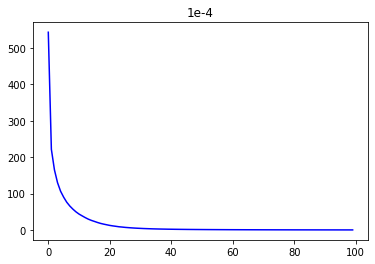

In [12]:
fig = plt.figure()
plt.title('1e-4')
plt.plot([i for i in range(100)],train_losses, color='blue')

In [10]:
lr = 1e-4
network = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

network.to(device)

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=1)

criterion = nn.CrossEntropyLoss()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
for epoch in range(1, n_epochs + 1):
  train(epoch)

1 547.6031560450792
2 222.3610682040453
3 166.39718797244132
4 131.62358885072172
5 108.00341513566673
6 90.93777902144939
7 77.35316855832934
8 66.25996273709461
9 57.63180755637586
10 50.44115555239841
11 44.484941992443055
12 39.31831829599105
13 35.02806959208101
14 30.886944863945246
15 27.54820538009517
16 24.302246682578698
17 21.87471590808127
18 19.61422170442529
19 17.40650157519849
20 15.485343243228272
21 13.66743677429622
22 12.365282737766393
23 11.0523435108189
24 9.923194636940025
25 8.915119880635757
26 8.094447587180184
27 7.422483256756095
28 6.6536444520170335
29 6.03324002068257
30 5.527111460949527
31 5.046421115490375
32 4.667326497161412
33 4.295528381349868
34 4.026900585886324
35 3.6611177191807656
36 3.436518437054474
37 3.188489351712633
38 2.997843181816279
39 2.805914019132615
40 2.654157602410123
41 2.4400396153359907
42 2.3311367334536044
43 2.209633593185572
44 2.0976160877617076
45 1.9824158447881928
46 1.8830166869447567
47 1.80673604747426
48 1.71352

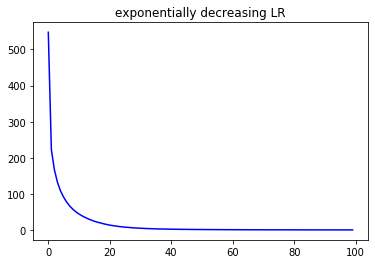

In [11]:
fig = plt.figure()
plt.title('exponentially decreasing LR')
plt.plot([i for i in range(100)],train_losses, color='blue')
plt.savefig('1_variable.png')

In [8]:
learning_rate = 1
network = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

network.to(device)

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=1)

criterion = nn.CrossEntropyLoss()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
for epoch in range(1, n_epochs + 1):
  train(epoch)

1 21363427733.64554
2 2160.7096745967865
3 2160.8071541786194
4 2161.0387024879456
5 2160.6377913951874
6 2160.4774293899536
7 2159.7142062187195
8 2159.2936539649963
9 2159.765840291977
10 2159.618823289871
11 2159.4474034309387
12 2159.481920003891
13 2159.0945410728455
14 2160.0457541942596
15 2159.4096670150757
16 2159.6807305812836
17 2159.5460073947906
18 2159.357740879059
19 2159.1749074459076
20 2158.7950072288513
21 2159.221207141876
22 2159.518989801407
23 2158.6395375728607
24 2159.4048941135406
25 2159.350128889084
26 2159.441150188446
27 2159.2866582870483
28 2159.0060245990753
29 2159.6690888404846
30 2159.2972497940063
31 2159.101032972336
32 2159.2725665569305
33 2159.502185821533
34 2159.156847715378
35 2159.132752895355
36 2159.266330718994
37 2159.2020399570465
38 2159.539799928665
39 2159.4948110580444
40 2158.9097027778625
41 2158.87051987648
42 2159.3096418380737
43 2159.55464220047
44 2159.449354171753
45 2159.0780849456787
46 2159.6769881248474
47 2158.900181055

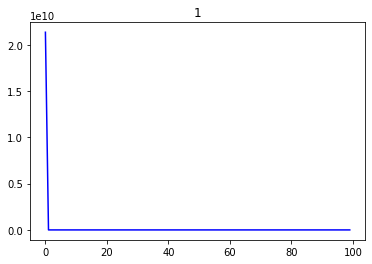

In [9]:
fig = plt.figure()
plt.title('1')
plt.plot([i for i in range(100)],train_losses, color='blue')
plt.savefig('1_1.png')

In [ ]:
learning_rate = 10
network = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

network.to(device)

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=1)

criterion = nn.CrossEntropyLoss()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
for epoch in range(1, n_epochs + 1):
    train(epoch)
    if(train_losses[len(train_losses)-1]>1e30):
        break

2.32684063911438
24.088465929031372
196916.71346592903
3909503.713465929
754077443967.7135
8874575570815.713
8888932167551.713
8888932167558.764
8888932167567.555
8888932167574.05
8888932167577.855
8888932167580.605
8888932167583.637
8888932167586.002
8888932167588.402
8888932167590.785
8888932167593.254
8888932167595.648
8888932167598.002
8888932167600.463
8888932167602.771
8888932167605.123
8888932167607.498
8888932167609.854
8888932167612.236
8888932167614.541
8888932167616.877
8888932167619.176
8888932167621.627
8888932167623.992
8888932167626.5
8888932167628.986
8888932167631.6
8888932167633.996
8888932167636.371
8888932167638.697
8888932167641.121
8888932167643.645
8888932167646.244
8888932167648.656
8888932167651.008
8888932167653.613
8888946243088.613
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18


1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.778448331

1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.7784483310309023e+18
1.778448331

489.3218479156494
491.7149167060852
494.08810687065125
496.43652081489563
498.91697812080383
501.2726800441742
503.67519187927246
506.080717086792
508.5400335788727
510.93664360046387
513.3184089660645
515.8363280296326
518.2795557975769
520.6332721710205
522.9757423400879
525.2297780513763
527.8187413215637
530.2198195457458
532.7091507911682
535.1200442314148
537.4469473361969
539.8519778251648
542.3668532371521
544.6955869197845
547.0083267688751
549.3527984619141
551.6717300415039
554.090329170227
556.4892647266388
558.860701084137
561.2582445144653
563.7677092552185
566.0924828052521
568.6635224819183
571.0458288192749
573.3361685276031
575.7310614585876
578.1897571086884
580.529819726944
582.9040858745575
585.2047047615051
587.5621798038483
589.8880867958069
592.2701351642609
594.6239194869995
596.9346852302551
599.2911837100983
601.7665979862213
604.275712966919
606.6416327953339
609.1595268249512
611.7421135902405
614.1745483875275
616.5495612621307
618.9002025127411
621.274209

1608.4254739284515
1610.785654783249
1613.1612432003021
1615.486343383789
1617.8190834522247
1620.1769404411316
1622.6448328495026
1625.0143485069275
1627.3746569156647
1629.8935265541077
1632.3010425567627
1634.695627450943
1637.0955464839935
1639.697726726532
1642.1371479034424
1644.5968661308289
1646.937909603119
1649.3462917804718
1651.7371072769165
1654.0870077610016
1656.5004632472992
1658.8689358234406
1661.257375240326
1663.7042424678802
1666.1126401424408
1668.5000219345093
1670.8570551872253
1673.3303158283234
1675.7682857513428
1678.1752572059631
1680.7534732818604
1683.1999216079712
1685.5662195682526
1687.909021139145
1690.344616651535
1692.8419117927551
1695.2169377803802
1697.5647284984589
1700.122346162796
1702.614557981491
1705.1215357780457
1707.521324634552
1709.9678943157196
1712.2952182292938
1714.6691961288452
1716.9953665733337
1719.4395072460175
1721.7522962093353
1724.1481313705444
1726.6755728721619
1729.1041946411133
1731.5121083259583
1733.8881239891052
1736

445.58419156074524
448.11188292503357
450.5036509037018
452.8405165672302
455.2519061565399
457.7025032043457
460.059698343277
462.4841947555542
464.9074606895447
467.20712518692017
469.5670473575592
472.103374004364
474.4538803100586
476.9325213432312
479.33639097213745
481.68493819236755
484.08935546875
486.5105245113373
488.87944984436035
491.3741660118103
493.7536287307739
496.24552488327026
498.7099962234497
501.1758930683136
503.5689435005188
505.98148012161255
508.3448278903961
510.712144613266
513.1279599666595
515.5730679035187
517.9654271602631
520.2771775722504
522.6596052646637
525.0880649089813
527.4349417686462
529.802737236023
532.1684536933899
534.4800469875336
536.7920751571655
539.1280777454376
541.6163268089294
543.969428062439
546.4032208919525
548.7728824615479
551.1349048614502
553.5945172309875
556.0345687866211
558.5380859375
560.957453250885
563.2946057319641
565.6996953487396
568.089241027832
570.4175827503204
572.7890040874481
575.3001391887665
577.7849659919

1565.8211846351624
1568.2361919879913
1570.6783304214478
1573.0276725292206
1575.3691432476044
1577.722843170166
1580.1255345344543
1582.5478630065918
1585.013670682907
1587.3301656246185
1589.6503810882568
1592.1106307506561
1594.544182062149
1596.84526181221
1599.581395149231
1602.0716526508331
1604.4688909053802
1606.856430530548
1609.2269625663757
1611.6168103218079
1614.0717914104462
1616.4225435256958
1618.8926639556885
1621.2505705356598
1623.5404109954834
1625.9974248409271
1628.3592805862427
1630.88419175148
1633.3782408237457
1635.797597169876
1638.2867541313171
1640.581124305725
1643.1326553821564
1645.6133847236633
1648.039568901062
1650.4899272918701
1652.8908941745758
1655.267528295517
1657.646065711975
1659.9518375396729
1662.3641641139984
1664.6973855495453
1667.2036094665527
1669.510660648346
1671.9559931755066
1674.345978975296
1676.6846940517426
1679.0439178943634
1681.3684000968933
1683.794033050537
1686.191225528717
1688.688042640686
1691.2615101337433
1693.5811049

404.6230890750885
406.97079586982727
409.33141136169434
411.771666765213
414.1269826889038
416.4606053829193
418.76358795166016
421.2237136363983
423.6534414291382
426.2017550468445
428.66408801078796
431.14141607284546
433.48196625709534
435.80828070640564
438.1046199798584
440.53246426582336
442.99739933013916
445.4298722743988
447.8125276565552
450.2377574443817
452.6972031593323
455.16452193260193
457.528559923172
460.02081060409546
462.33934569358826
464.7392635345459
467.30304193496704
469.59708881378174
471.9872350692749
474.54670119285583
476.95189237594604
479.33214950561523
481.75520753860474
484.10729789733887
486.50221037864685
489.01591324806213
491.4508318901062
493.78734517097473
496.20454359054565
498.58294677734375
501.0980226993561
503.6041443347931
506.0740351676941
508.5715675354004
511.07403111457825
513.3361668586731
515.7794706821442
518.0628509521484
520.3753173351288
522.6224915981293
525.0543901920319
527.465892791748
529.9538524150848
532.326418876648
534.692

1527.8211805820465
1530.1883912086487
1532.5267174243927
1534.8866584300995
1537.2967703342438
1539.7508010864258
1542.2520921230316
1544.5872359275818
1547.057635307312
1549.3980786800385
1551.7460770606995
1554.033650636673
1556.4803891181946
1558.894006729126
1561.355883359909
1563.7530055046082
1566.2697818279266
1568.7628450393677
1571.1320316791534
1573.6590931415558
1575.9856510162354
1578.4050543308258
1580.773555278778
1583.1803305149078
1585.5577507019043
1587.951102256775
1590.5597972869873
1592.933191537857
1595.411196231842
1597.9014112949371
1600.322955608368
1602.7675297260284
1605.1280088424683
1607.5676593780518
1610.0545136928558
1612.3951778411865
1614.9256007671356
1617.4078586101532
1619.8877046108246
1622.2541460990906
1624.7427561283112
1627.2585129737854
1629.5936784744263
1631.9995419979095
1634.447761774063
1636.802274465561
1639.1670098304749
1641.4193105697632
1643.9342105388641
1646.2798237800598
1648.6487972736359
1651.196461200714
1653.6446070671082
1656.

357.76373982429504
360.134304523468
362.5757899284363
364.89167857170105
367.3943974971771
369.8540155887604
372.17432165145874
374.64598870277405
377.052814245224
379.4929687976837
381.89437317848206
384.35029649734497
386.7548427581787
389.0517477989197
391.4100179672241
393.8306334018707
396.1966059207916
398.7057580947876
401.040540933609
403.4057137966156
405.83175253868103
408.19278955459595
410.5907735824585
412.9633321762085
415.3003659248352
417.66616201400757
420.0644762516022
422.4514033794403
424.791894197464
427.42199873924255
429.84294605255127
432.2697694301605
434.6122844219208
436.9546203613281
439.3913552761078
441.7683594226837
444.0897536277771
446.63389921188354
448.96112966537476
451.3628764152527
453.8329334259033
456.26516461372375
458.6818871498108
461.2228682041168
463.6551902294159
466.03852009773254
468.3941614627838
470.6986894607544
473.11605739593506
475.4498653411865
477.88251423835754
480.4468455314636
482.7342460155487
485.2991690635681
487.60581779479

1474.6682527065277
1476.9773828983307
1479.3295404911041
1481.7749927043915
1484.1830294132233
1486.504900932312
1488.9834628105164
1491.3575868606567
1493.8056778907776
1496.2202653884888
1498.5977900028229
1501.0063016414642
1503.39142370224
1505.917950630188
1508.3669555187225
1510.7987341880798
1513.151662349701
1515.567219734192
1517.9451279640198
1520.4303538799286
1522.8620872497559
1525.4333708286285
1527.8682076931
1530.1830451488495
1532.6000134944916
1535.00657081604
1537.3650238513947
1539.670780658722
1542.0515909194946
1544.4310941696167
1546.908744096756
1549.4252784252167
1551.8457033634186
1554.3303270339966
1556.8143153190613
1559.394389629364
1561.8437118530273
1564.2932963371277
1566.6971864700317
1569.079094171524
1571.5047435760498
1573.9516191482544
1576.2554767131805
1578.6251292228699
1581.0065324306488
1583.488174200058
1585.9081213474274
1588.4037637710571
1590.7925045490265
1593.0914661884308
1595.520438194275
1597.8583409786224
1600.3221986293793
1602.85298

273.09511518478394
275.6132581233978
278.017080783844
280.3690423965454
282.6988010406494
285.25094985961914
287.67470502853394
290.02082443237305
292.3382239341736
294.70250940322876
297.0372750759125
299.46487617492676
301.9808485507965
304.3217988014221
306.8200194835663
309.23458552360535
311.5581634044647
314.04290199279785
316.4872717857361
318.888710975647
321.4059762954712
323.9004726409912
326.2879066467285
328.60110092163086
330.96912837028503
333.3903052806854
335.906950712204
338.4222557544708
340.90294766426086
343.3486783504486
345.8921949863434
348.4371249675751
350.9565989971161
353.5806174278259
356.0172884464264
358.46277618408203
360.85592126846313
363.4222095012665
365.81041431427
368.2345132827759
370.5827798843384
372.9892649650574
375.4341480731964
377.7781057357788
380.21262669563293
382.65636134147644
385.0698697566986
387.549599647522
390.0114393234253
392.4381127357483
394.84950709342957
397.26449632644653
399.7187728881836
402.0709593296051
404.4583926200866

1393.356521844864
1395.6173572540283
1398.0625188350677
1400.5398137569427
1402.9600195884705
1405.388867855072
1407.974027633667
1410.3617179393768
1412.8744552135468
1415.3658192157745
1417.7596056461334
1420.3130376338959
1422.7106974124908
1425.1403939723969
1427.490816116333
1429.9119210243225
1432.2374017238617
1434.6672322750092
1437.196983575821
1439.5777089595795
1441.9602646827698
1444.518459558487
1446.8649032115936
1449.3201744556427
1451.6054968833923
1453.9817736148834
1456.3249852657318
1458.6554746627808
1461.0145196914673
1463.4960627555847
1465.8713426589966
1468.2722656726837
1470.6994965076447
1473.17924284935
1475.659520149231
1478.1075599193573
1480.5483264923096
1483.0070130825043
1485.4165024757385
1487.7681894302368
1490.0856096744537
1492.4881927967072
1495.0100700855255
1497.666902065277
1500.0513677597046
1502.4325551986694
1504.8219256401062
1507.1828558444977
1509.5026519298553
1511.9764823913574
1514.225018978119
1516.6645030975342
1519.0787587165833
1521

223.59085607528687
225.94628596305847
228.36343550682068
230.69519186019897
233.0979437828064
235.49227595329285
237.91639733314514
240.51511454582214
242.93470978736877
245.30271244049072
247.77374148368835
250.16912817955017
252.5591220855713
254.90061783790588
257.32739639282227
259.82837653160095
262.22867584228516
264.6819272041321
267.2697148323059
269.6420612335205
272.07356119155884
274.4301748275757
276.7499499320984
279.26799178123474
281.65729784965515
283.98869490623474
286.3767364025116
288.7701873779297
291.2584798336029
293.6519122123718
296.0602686405182
298.4167411327362
300.8795702457428
303.34490990638733
305.76005029678345
308.08995175361633
310.4864647388458
312.93266248703003
315.34404730796814
317.76942133903503
320.2839024066925
322.7226586341858
325.1367199420929
327.5069522857666
329.90580701828003
332.1912798881531
334.7165207862854
337.1825180053711
339.61320424079895
341.9789385795593
344.3922629356384
347.0059485435486
349.3291826248169
351.93306016921997


1309.2770676612854
1311.7084851264954
1314.0723960399628
1316.3342666625977
1318.927119731903
1321.4416253566742
1323.7925775051117
1326.1807460784912
1328.5163037776947
1330.9340755939484
1333.2787907123566
1335.8322494029999
1338.2772905826569
1340.619168996811
1343.0452346801758
1345.439136981964
1347.868263244629
1350.449686050415
1352.9190337657928
1355.3560719490051
1357.8368866443634
1360.1860938072205
1362.4653532505035
1365.0105543136597
1367.3941180706024
1369.7815599441528
1372.1920583248138
1374.523225069046
1377.1243052482605
1379.517151594162
1382.047996044159
1384.3836867809296
1387.0191872119904
1389.470366716385
1392.0265009403229
1394.4391059875488
1396.7950139045715
1399.145429611206
1401.5829436779022
1403.9118926525116
1406.295418024063
1408.571890115738
1411.0004398822784
1413.3305261135101
1415.7171635627747
1418.0304419994354
1420.3587067127228
1422.7647922039032
1425.049203157425
1427.430133342743
1429.8945534229279
1432.222687959671
1434.689710855484
1437.0344

147.23028445243835
149.62096405029297
152.0522072315216
154.4312286376953
156.82039761543274
159.1611089706421
161.6038053035736
164.0063352584839
166.3387200832367
168.6771595478058
171.03520941734314
173.36152410507202
175.78895473480225
178.14761781692505
180.59496235847473
182.9554660320282
185.35604453086853
187.6119737625122
190.01700162887573
192.39184165000916
194.76769495010376
197.20398449897766
199.59884071350098
201.9769561290741
204.32939291000366
206.6492702960968
209.02586936950684
211.4194097518921
213.75445532798767
216.1336088180542
218.94592237472534
221.476003408432
223.8489806652069
226.33875918388367
228.7619707584381
231.10972499847412
233.44063353538513
235.91957235336304
238.52497673034668
240.8399248123169
243.32733273506165
245.73940682411194
248.22542476654053
250.59265303611755
253.00005841255188
255.4605586528778
257.78523898124695
260.1366982460022
262.50269174575806
265.02965903282166
267.4442799091339
269.88265442848206
272.33511209487915
274.7736792564

1260.7517628669739
1263.267954826355
1265.5783987045288
1268.0615711212158
1270.5545907020569
1272.9085383415222
1275.314620733261
1277.6736540794373
1280.0573196411133
1282.3792066574097
1284.8659400939941
1287.1640079021454
1289.5317571163177
1292.1051585674286
1294.525334596634
1296.914958000183
1299.34823346138
1301.7282955646515
1304.1676309108734
1306.6696813106537
1309.1207163333893
1311.5406591892242
1314.0038585662842
1316.2979445457458
1318.7402477264404
1321.0919771194458
1323.5225901603699
1325.9320681095123
1328.3424608707428
1330.7608199119568
1333.2922637462616
1335.7104840278625
1338.3122353553772
1340.7701382637024
1343.1176316738129
1345.5080568790436
1347.8620386123657
1350.1981844902039
1352.6656439304352
1355.0525949001312
1357.4943313598633
1359.8916687965393
1362.2927219867706
1364.7120144367218
1367.1141378879547
1369.4707169532776
1372.0807077884674
1374.4427671432495
1376.8001942634583
1379.1073727607727
1381.3878610134125
1383.7705481052399
1386.160899400711


94.61323642730713
96.98943519592285
99.35798287391663
101.90031552314758
104.33295679092407
106.73143982887268
109.13042068481445
111.51465344429016
113.92875814437866
116.29292702674866
118.77202939987183
121.17209649085999
123.62219095230103
126.0241584777832
128.45451045036316
130.84459805488586
133.3255319595337
135.7455883026123
138.11490678787231
140.62674260139465
143.01800775527954
145.42588829994202
147.94632411003113
150.36329889297485
152.75308537483215
155.1952121257782
157.60195350646973
160.06258249282837
162.39761424064636
164.79763627052307
167.25812363624573
169.69003033638
172.2497251033783
174.76473426818848
177.27860617637634
179.55234265327454
182.04726457595825
184.559072971344
186.89006066322327
189.4168243408203
191.7543818950653
194.20984649658203
196.53495240211487
198.87947034835815
201.22505903244019
203.71415519714355
206.03322625160217
208.45489835739136
210.8073332309723
213.16517543792725
215.60787343978882
217.97586464881897
220.26008129119873
222.51219

1211.3423328399658
1213.664172410965
1215.9985842704773
1218.439846277237
1220.9545395374298
1223.246120929718
1225.6189849376678
1228.1291103363037
1230.5886793136597
1233.0308604240417
1235.496010541916
1238.0255386829376
1240.4304327964783
1242.792669057846
1245.1996533870697
1247.7807173728943
1250.1685419082642
1252.703254699707
1255.1297934055328
1257.631587266922
1260.0770177841187
1262.4041924476624
1264.8217589855194
1267.1899032592773
1269.6285161972046
1272.0536422729492
1274.3964307308197
1276.822853565216
1279.3015809059143
1281.7670423984528
1284.055728673935
1286.4743394851685
1288.934440612793
1291.5435440540314
1294.076488494873
1296.384944677353
1298.890835762024
1301.2503070831299
1303.7302815914154
1306.3665552139282
1308.6410295963287
1311.229784488678
1313.5558202266693
1315.9672214984894
1318.3721754550934
1320.8315246105194
1323.287075996399
1325.640578508377
1328.1034984588623
1330.4354720115662
1332.878758430481
1335.3023753166199
1337.6452465057373
1340.01289

24.12030553817749
26.484196186065674
29.004853010177612
31.391091108322144
33.64638590812683
36.113739252090454
38.470359563827515
40.85310411453247
43.17736625671387
45.70828676223755
48.01014232635498
50.33935189247131
52.65160512924194
55.066466093063354
57.44201350212097
59.814188957214355
62.28619933128357
64.6182816028595
67.08253216743469
69.55148124694824
72.0195083618164
74.64078640937805
77.17608571052551
79.5016098022461
81.93224310874939
84.4342520236969
86.84178495407104
89.30527019500732
91.67178750038147
94.06257343292236
96.48336434364319
98.94345116615295
101.40792298316956
103.77596783638
106.18974828720093
108.66130709648132
111.08185577392578
113.48780465126038
116.00754880905151
118.534432888031
120.9066686630249
123.29757499694824
125.67283916473389
128.0074622631073
130.39355754852295
132.75233507156372
135.16464161872864
137.50316715240479
139.89954328536987
142.2905342578888
144.70028614997864
147.07619404792786
149.56336975097656
151.91975331306458
154.5597028

1138.1780941486359
1140.6512932777405
1143.0261759757996
1145.4599192142487
1147.8369109630585
1150.1533994674683
1152.6063697338104
1154.917242527008
1157.3675837516785
1159.7704224586487
1162.3647637367249
1164.7781677246094
1167.3393969535828
1169.7992825508118
1172.1455793380737
1174.5072162151337
1177.0928444862366
1179.8538279533386
1182.2401640415192
1184.5762617588043
1187.0689074993134
1189.5143365859985
1191.9262690544128
1194.4758956432343
1196.8438494205475
1199.3090772628784
1201.7972843647003
1204.1358399391174
1206.535099029541
1208.9821310043335
1211.3111028671265
1213.6859331130981
1216.0710871219635
1218.4635150432587
1220.7766916751862
1223.1334521770477
1225.520485162735
1227.8913974761963
1230.5269770622253
1232.8933894634247
1235.2637355327606
1237.6230204105377
1239.9527637958527
1242.3255741596222
1244.6560027599335
1247.101990699768
1249.4888293743134
1251.8696312904358
1254.2140500545502
1256.6584815979004
1259.0295612812042
1261.3746881484985
1263.80201530456

2205.518013715744
2207.890168428421
2210.1791229248047
2212.6618535518646
2215.017326593399
2217.6180551052094
2220.0316236019135
2222.432686328888
2224.9229357242584
2227.3600697517395
2229.8370525836945
2232.295759677887
2234.751921415329
2237.231418132782
2239.7320392131805
2242.1881201267242
2244.5939939022064
2246.9069764614105
2249.284680366516
2251.6080951690674
2253.9666419029236
2256.3584036827087
2258.7340388298035
2261.0900864601135
2263.463897705078
10 2263.463897705078
2.403862714767456
4.8065924644470215
7.184475421905518
9.516183614730835
11.974481344223022
14.384783506393433
16.781518936157227
19.23038339614868
21.493489503860474
24.085049867630005
26.581414937973022
28.97146773338318
31.445080757141113
33.9110746383667
36.28404879570007
38.68998098373413
41.05244302749634
43.3955020904541
45.80530643463135
48.23249387741089
50.69472575187683
53.19128108024597
55.512086391448975
58.031739473342896
60.43342137336731
62.863569498062134
65.42548727989197
67.88977646827698


1038.028175830841
1040.3966467380524
1042.709314584732
1045.0976736545563
1047.6631963253021
1050.064029932022
1052.5429770946503
1054.989242553711
1057.505375623703
1059.8488674163818
1062.4712533950806
1064.9698011875153
1067.5866475105286
1069.9934606552124
1072.42622756958
1074.7704286575317
1077.1285045146942
1079.4309470653534
1081.8360278606415
1084.1718389987946
1086.547208070755
1088.916378736496
1091.3711619377136
1093.7599391937256
1096.1204104423523
1098.4361867904663
1100.8309304714203
1103.4116849899292
1105.7734920978546
1108.34987616539
1110.6391386985779
1113.2262580394745
1115.6793148517609
1118.0613281726837
1120.493182182312
1122.838161945343
1125.2273819446564
1127.6826417446136
1129.9824197292328
1132.5234270095825
1134.9116926193237
1137.3439347743988
1139.767986536026
1142.1815593242645
1144.4694170951843
1146.9272511005402
1149.2684953212738
1151.6606631278992
1154.0871982574463
1156.5673141479492
1159.1035358905792
1161.5867710113525
1164.0425386428833
1166.39

2142.443261384964
2144.758228778839
2147.2111620903015
2149.5434617996216
2151.8369777202606
2154.2230548858643
2156.7089841365814
2159.1170868873596
2161.456887483597
2163.965965986252
2166.432328224182
2168.8227586746216
2171.231834411621
2173.6348683834076
2176.106498003006
2178.7036941051483
2181.1783549785614
2183.533303976059
2186.006956577301
2188.4749801158905
2190.8957936763763
2193.454740047455
2195.8139872550964
2198.2361509799957
2200.727560043335
2203.236755132675
2205.591436624527
2207.9528028964996
2210.380395889282
2212.8639328479767
2215.1437435150146
2217.5723929405212
2219.951648950577
2222.392158985138
2224.8009164333344
2227.1835544109344
2229.6406400203705
2232.0517058372498
2234.4586794376373
2236.8308696746826
2239.1723074913025
2241.601804256439
2243.99617600441
2246.3582649230957
2248.6774435043335
2251.0272302627563
2253.4245047569275
2255.7100443840027
2258.2267327308655
2260.666426420212
2263.09125995636
11 2263.09125995636
2.4694912433624268
4.985967874526

1009.9254460334778
1012.3300364017487
1014.7489519119263
1017.2507603168488
1019.528796672821
1022.0090098381042
1024.3933317661285
1026.9315674304962
1029.3370609283447
1031.8007471561432
1034.2180435657501
1036.6959171295166
1039.0101158618927
1041.539654493332
1043.9001235961914
1046.2854158878326
1048.6597435474396
1051.0976984500885
1053.5391206741333
1055.9453647136688
1058.4076685905457
1060.711193561554
1063.0227899551392
1065.3464894294739
1067.771188735962
1070.1039519309998
1072.565067768097
1075.2222983837128
1077.7433586120605
1080.279773235321
1082.6546602249146
1084.998138666153
1087.3197090625763
1089.6507630348206
1091.9565052986145
1094.4071395397186
1096.877159833908
1099.3374047279358
1101.7934875488281
1104.1728010177612
1106.5769519805908
1108.9453880786896
1111.3746178150177
1113.7176868915558
1116.0603783130646
1118.6354839801788
1120.9863312244415
1123.6038484573364
1125.9833364486694
1128.415236234665
1130.7665741443634
1133.0541093349457
1135.4262073040009
11

2080.0306096076965
2082.3768804073334
2084.8506140708923
2087.279288291931
2089.7117307186127
2092.062281847
2094.5135695934296
2096.8579597473145
2099.494698524475
2102.065677881241
2104.599354028702
2107.187520980835
2109.543260574341
2112.012003183365
2114.34423327446
2116.8265023231506
2119.291669845581
2121.6380999088287
2124.0597829818726
2126.481597661972
2128.908034801483
2131.4245109558105
2133.7451117038727
2136.0613865852356
2138.4520943164825
2140.7484073638916
2143.165583372116
2145.5739464759827
2148.0043907165527
2150.788281917572
2153.3281774520874
2156.053953409195
2158.485552549362
2160.832010984421
2163.210175037384
2165.6210584640503
2167.988063097
2170.359394311905
2172.8381423950195
2175.2005548477173
2177.8196568489075
2180.213627099991
2182.6962196826935
2184.989205121994
2187.3017258644104
2189.5403208732605
2191.9471447467804
2194.2634978294373
2196.6312460899353
2199.0773384571075
2201.5549881458282
2204.081239461899
2206.6478362083435
2209.0462267398834
2211

900.8507361412048
903.1845498085022
905.44846367836
907.9028372764587
910.2831342220306
912.6052734851837
914.9615216255188
917.2259476184845
919.6050024032593
921.9541068077087
924.3819653987885
926.7150514125824
929.2499384880066
931.550009727478
933.940839767456
936.3707103729248
938.7948191165924
941.2859075069427
943.7051980495453
946.0546703338623
948.4284572601318
950.8754539489746
953.1777064800262
955.6009933948517
958.0474307537079
960.5633373260498
962.8873708248138
965.3320004940033
967.7825398445129
970.0805997848511
972.437495470047
974.726007938385
977.3852407932281
979.8357639312744
982.2843782901764
984.7491953372955
987.080267906189
989.5049543380737
991.9943301677704
994.3615069389343
996.8673586845398
999.1724843978882
1001.6381649971008
1003.9551486968994
1006.2935993671417
1008.7778749465942
1011.0664205551147
1013.502956867218
1015.904983997345
1018.3308947086334
1020.6419780254364
1023.0158140659332
1025.3608131408691
1027.7148716449738
1030.1046876907349
1032.5

1967.5039081573486
1969.945083618164
1972.454892873764
1974.9521741867065
1977.4046940803528
1979.8595440387726
1982.127679347992
1984.510948419571
1987.0573289394379
1989.402198791504
1991.9862773418427
1994.4529674053192
1996.790053844452
1999.1467339992523
2001.576589345932
2003.9994370937347
2006.5253450870514
2008.9898691177368
2011.2364757061005
2013.5839622020721
2015.9279899597168
2018.472419977188
2020.889407157898
2023.3415961265564
2025.7150902748108
2028.0551433563232
2030.56493806839
2032.9404973983765
2035.3635807037354
2037.7168235778809
2040.026077747345
2042.4927759170532
2044.8652296066284
2047.2510557174683
2049.6936271190643
2052.11368560791
2054.4937863349915
2056.8484444618225
2059.1350317001343
2061.6300497055054
2063.952841758728
2066.385487318039
2068.88454914093
2071.161235809326
2073.5769262313843
2075.928748369217
2078.270038843155
2080.581234693527
2082.9182291030884
2085.289192199707
2087.6651039123535
2090.091913461685
2092.587180376053
2094.989799261093


807.8620438575745
810.2229993343353
812.7049314975739
815.1691069602966
817.5579886436462
819.8620038032532
822.3290235996246
824.7140161991119
827.0756511688232
829.4543676376343
831.7994639873505
834.1650688648224
836.6454646587372
838.963520526886
841.4644241333008
843.7900059223175
846.2046275138855
848.5511677265167
850.8874614238739
853.2300100326538
855.6652727127075
858.093364238739
860.4584035873413
862.8917372226715
865.1755380630493
867.6514344215393
870.0241417884827
872.4746956825256
874.7577562332153
877.2964363098145
879.6240699291229
881.9798312187195
884.3148491382599
886.667943239212
889.0572967529297
891.4112832546234
893.7682161331177
896.1091675758362
898.4147667884827
901.1005749702454
903.4738001823425
905.9001295566559
908.3380582332611
910.7065489292145
913.0427973270416
915.5398626327515
917.9470067024231
920.2697274684906
922.6210250854492
925.068461894989
927.5458371639252
929.8699305057526
932.2424032688141
934.545202255249
936.9061257839203
939.23740649223

1912.4052121639252
1914.854790687561
1917.3477802276611
1919.7535712718964
1922.123726606369
1924.5978000164032
1926.956939458847
1929.5517795085907
1931.9911069869995
1934.5069875717163
1936.9884502887726
1939.3788216114044
1941.7339227199554
1944.2307183742523
1946.5707521438599
1949.2365036010742
1951.6177814006805
1954.127895116806
1956.4840528964996
1958.8426010608673
1961.2948496341705
1963.6460955142975
1965.9567573070526
1968.24369931221
1970.5559782981873
1972.9565382003784
1975.280690908432
1977.6930639743805
1980.0456054210663
1982.432345867157
1984.8000679016113
1987.17009806633
1989.4916305541992
1992.0127565860748
1994.3140177726746
1996.6893405914307
1999.2050080299377
2001.5234479904175
2004.0535609722137
2006.3373448848724
2008.753544807434
2011.1681520938873
2013.6527333259583
2015.992496728897
2018.4283714294434
2020.7881700992584
2023.165872335434
2025.5018723011017
2027.8517792224884
2030.220992565155
2032.6863331794739
2035.0366606712341
2037.342869758606
2039.752

734.0583350658417
736.3403503894806
738.7495579719543
741.1054255962372
743.4971299171448
745.9053101539612
748.2828238010406
750.6785316467285
753.1939415931702
755.6111330986023
757.8797373771667
760.3062031269073
762.7215287685394
765.0975501537323
767.4858114719391
769.8079991340637
772.1650149822235
774.493287563324
776.949889421463
779.2822144031525
781.7891504764557
784.2300522327423
786.6508214473724
789.1212401390076
791.4898660182953
793.8563687801361
796.3320219516754
798.670309305191
801.1118319034576
803.4509227275848
805.9085431098938
808.5400424003601
810.9366838932037
813.4951252937317
815.9626393318176
818.3155303001404
820.6390178203583
823.1500287055969
825.4762942790985
827.9894416332245
830.3186392784119
832.686413526535
835.0475382804871
837.3790123462677
839.8910562992096
842.2323246002197
844.687225818634
847.0600941181183
849.4831171035767
851.8984673023224
854.2296969890594
856.6249849796295
859.0078537464142
861.4106774330139
863.827033996582
866.202431678772

In [ ]:
fig = plt.figure()
plt.title('10')
plt.plot([i for i in range(len(train_losses))],train_losses, color='blue')
plt.savefig('1_10.png')